In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('datasets/cleaned_train_data.csv')

In [3]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,ssn3_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,533352170,60,RL,43.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


In [82]:
df.isnull().sum().sum()

38

In [4]:
df.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', 'flr2nd_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_

In [5]:
nominal=['pid','ms_subclass','ms_zoning','street','alley','land_contour','lot_config',
         'neighborhood','condition_1','condition_2', 'bldg_type',
       'house_style','roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type','foundation','heating','central_air',
        'garage_type','misc_feature']

ordinal=['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond',
        'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
         'heating_qc','electrical','kitchen_qual','functional','fireplace_qu',
         'garage_finish','garage_qual','garage_cond','paved_drive','pool_qc',
         'fence']
discrete =['year_built','year_remod/add','bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr','totrms_abvgrd',
          'fireplaces','garage_yr_blt','garage_cars','mo_sold', 'yr_sold']
continuous= ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1',
    'bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', 'flr2nd_sf', 'low_qual_fin_sf',
    'gr_liv_area','garage_area','wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'ssn3_porch',
       'screen_porch', 'pool_area','misc_val']


In [6]:
(df[continuous+['saleprice']]).corr()

,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,flr2nd_sf,low_qual_fin_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,ssn3_porch,screen_porch,pool_area,misc_val,saleprice
lot_frontage,1.000000,0.356891,0.161024,0.174915,0.029508,0.094525,0.283977,0.376362,0.019005,0.001610,0.314403,0.296365,0.101789,0.159632,-0.009254,0.021173,0.072579,0.135255,0.042589,0.290542
lot_area,0.356891,1.000000,0.167978,0.215696,0.041763,0.041232,0.277580,0.381823,0.029304,0.001259,0.327451,0.263168,0.155667,0.140792,0.014091,0.019540,0.067679,0.115096,0.093912,0.296794
mas_vnr_area,0.161024,0.167978,1.000000,0.316998,-0.015678,0.080769,0.399624,0.381944,0.099695,-0.061535,0.381003,0.378895,0.162868,0.155046,-0.107830,0.011109,0.086156,0.012360,0.078801,0.502199
bsmtfin_sf_1,0.174915,0.215696,0.316998,1.000000,-0.050060,-0.473720,0.539189,0.462334,-0.167504,-0.078280,0.215721,0.331242,0.214505,0.140697,-0.076714,0.047773,0.093385,0.075949,0.130071,0.423825
bsmtfin_sf_2,0.029508,0.041763,-0.015678,-0.050060,1.000000,-0.231279,0.086830,0.095927,-0.087505,-0.002764,0.001272,0.013629,0.105971,-0.004382,0.004540,-0.024225,0.096405,0.061026,-0.005515,0.016590
bsmt_unf_sf,0.094525,0.041232,0.080769,-0.473720,-0.231279,1.000000,0.418789,0.301880,-0.012683,0.059620,0.234384,0.145354,-0.034652,0.116267,-0.010728,0.020445,-0.055476,-0.039196,-0.005860,0.189603
total_bsmt_sf,0.283977,0.277580,0.399624,0.539189,0.086830,0.418789,1.000000,0.808703,-0.216640,-0.022349,0.453961,0.488946,0.224808,0.257931,-0.087706,0.060387,0.076342,0.061570,0.125699,0.628884
1st_flr_sf,0.376362,0.381823,0.381944,0.462334,0.095927,0.301880,0.808703,1.000000,-0.268580,-0.010348,0.562519,0.498751,0.226158,0.259519,-0.043859,0.067058,0.089306,0.130059,0.139575,0.618284
flr2nd_sf,0.019005,0.029304,0.099695,-0.167504,-0.087505,-0.012683,-0.216640,-0.268580,1.000000,0.014607,0.639237,0.119763,0.109200,0.164856,0.020944,-0.033211,0.035002,0.012620,0.004380,0.248968
low_qual_fin_sf,0.001610,0.001259,-0.061535,-0.078280,-0.002764,0.059620,-0.022349,-0.010348,0.014607,1.000000,0.106273,-0.070984,-0.017231,-0.006291,0.089867,-0.003466,0.014203,-0.006858,-0.005761,-0.041549


**bsmtfin_sf_2,low_qual_fin_sf,ssn3_porch,pool_area,misc_val don't seem to have enough correlation with Dependent Variable**

**can combine area_sf=1st_flr_sf + flr2nd_sf-gr_liv_area-garage_area+open_porch_sf+total_bsmt_sf**

In [7]:
df['area_sf']= df['1st_flr_sf']+ df.flr2nd_sf - df.gr_liv_area - df.garage_area + df.open_porch_sf + df.total_bsmt_sf


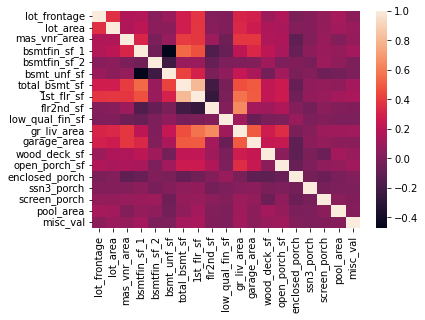

In [8]:
sns.heatmap(df[continuous].corr());

In [9]:
continuous_tbu = ['lot_frontage','lot_area','mas_vnr_area','area_sf']

In [10]:
df[discrete+['saleprice']].corr()

,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold,saleprice
year_built,1.000000,0.628894,0.216147,-0.031170,0.479963,0.283745,-0.041607,-0.127090,0.137984,0.168563,0.768345,0.543334,-0.007649,-0.003233,0.571592
year_remod/add,0.628894,1.000000,0.154273,-0.037641,0.471351,0.224593,-0.019218,-0.135859,0.202607,0.138573,0.632310,0.440346,0.011038,0.043073,0.550112
bsmt_full_bath,0.216147,0.154273,1.000000,-0.146767,-0.011077,-0.026441,-0.159579,-0.029388,-0.040104,0.163071,0.145001,0.173907,-0.008995,0.034969,0.283892
bsmt_half_bath,-0.031170,-0.037641,-0.146767,1.000000,-0.060086,-0.047444,0.012418,-0.079303,-0.054299,0.061360,-0.053906,-0.032502,0.026561,-0.010187,-0.045171
full_bath,0.479963,0.471351,-0.011077,-0.060086,1.000000,0.153977,0.344644,0.166041,0.519820,0.218646,0.466463,0.465904,0.049029,0.007364,0.537794
half_bath,0.283745,0.224593,-0.026441,-0.047444,0.153977,1.000000,0.230689,-0.040229,0.339589,0.203531,0.236268,0.232519,0.010891,0.001774,0.283511
bedroom_abvgr,-0.041607,-0.019218,-0.159579,0.012418,0.344644,0.230689,1.000000,0.227165,0.655479,0.079542,-0.044237,0.085760,0.068820,-0.011990,0.137681
kitchen_abvgr,-0.127090,-0.135859,-0.029388,-0.079303,0.166041,-0.040229,0.227165,1.000000,0.276643,-0.134696,-0.086293,-0.034190,0.047257,0.020743,-0.125373
totrms_abvgrd,0.137984,0.202607,-0.040104,-0.054299,0.519820,0.339589,0.655479,0.276643,1.000000,0.311889,0.164333,0.367914,0.054307,-0.022124,0.504316
fireplaces,0.168563,0.138573,0.163071,0.061360,0.218646,0.203531,0.079542,-0.134696,0.311889,1.000000,0.078729,0.311208,0.017918,0.007074,0.470936


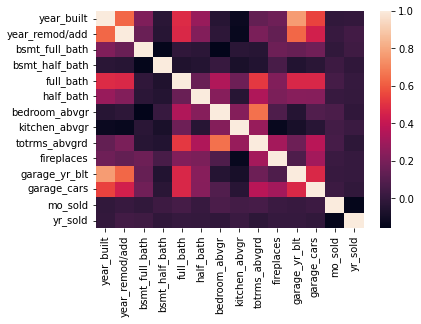

In [11]:
sns.heatmap(df[discrete].corr());

**bsmt_half_bath, yr_sold,mo_sold don't seem to have enough correaltion with DV**

**can combine tot_bath= full_bath + 0.5*half_bath and bsmt_bath=bsmt_full_bath+0.5*bsmt_half_bath
  abv_grd_combined= totrms_abvgrd+kitchen_abvgrd**
    
**garage_cars would be correlated with garage_area which is already accounted for in continuous case**

**garage_yr_blt can be dropped as it has high correlation with year_built**

In [12]:
df['tot_bath']=df.full_bath+0.5*df.half_bath
df['bsmt_bath']=df.bsmt_full_bath + 0.5*df.bsmt_half_bath
df['abv_grd_combined'] = df.totrms_abvgrd+df.kitchen_abvgr

In [13]:
discrete_tbu = ['year_built','tot_bath','bsmt_bath','abv_grd_combined']
# discrete features to be used 

In [14]:
nominal_tbu = ['ms_subclass','ms_zoning','neighborhood','land_contour','central_air']
# based on self analysis 

In [15]:
ordinal_tbu = ['utilities','overall_qual','heating_qc']
# based on self analysis 

#### Creating dummies for ordinal and nominal columns to be used in the model

In [16]:
df = pd.get_dummies(df, columns=nominal_tbu)


In [17]:
df.drop(columns= ['neighborhood_Veenker'],inplace=True)#dropping one dummy column for each category

In [18]:
df.drop(columns='land_contour_Low', inplace=True)#dropping one dummy column for each category

In [19]:
df.drop(columns='central_air_N', inplace=True)

In [20]:
df.drop(columns='ms_subclass_150',inplace=True)

In [21]:
df.drop(columns='ms_zoning_RH',inplace=True)

In [22]:
df.drop(df[df.utilities!='AllPub'].index,inplace=True)

In [23]:
df.columns

Index(['pid', 'lot_frontage', 'lot_area', 'street', 'lot_shape', 'utilities',
       'lot_config', 'land_slope', 'condition_1', 'condition_2',
       ...
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Lvl',
       'central_air_Y'],
      dtype='object', length=127)

In [24]:
df.isnull().sum().sum()

0

**So we don't need to take into consideration utilities feature as it is common for all entries now**

In [25]:
map_heating_qc ={'Ex':5, 'TA':4, 'Gd':3, 'Fa':2,'Po':1}

In [26]:
df.heating_qc =df.heating_qc.map(map_heating_qc)

In [27]:
ordinal_tbu = ['overall_qual','heating_qc']
#updated ordinal columns to be used

In [28]:
df.isnull().sum().sum()

0

In [51]:
continuous_tbu = ['lot_frontage','lot_area','mas_vnr_area','area_sf']
ordinal_tbu = ['overall_qual','heating_qc']
discrete_tbu = ['year_built','tot_bath','bsmt_bath','abv_grd_combined']
# nominal_tbu = ['ms_subclass','ms_zoning','neighborhood','land_contour','central_air']
nominal_tbu =['neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Names', 'neighborhood_Timber', 'neighborhood_Edwards', 'neighborhood_OldTown',
       'neighborhood_BrDale', 'neighborhood_CollgCr', 'neighborhood_Somerst', 'neighborhood_Mitchel', 'neighborhood_StoneBr', 'neighborhood_NridgHt',
       'neighborhood_Gilbert', 'neighborhood_Crawfor', 'neighborhood_IDOTRR', 'neighborhood_NWAmes', 'neighborhood_MeadowV',
       'neighborhood_SWISU', 'neighborhood_NoRidge', 'neighborhood_ClearCr', 'neighborhood_Blmngtn', 'neighborhood_BrkSide', 'neighborhood_NPkVill',
       'neighborhood_Blueste', 'neighborhood_GrnHill', 'neighborhood_Greens', 'neighborhood_Landmrk',
        'land_contour_Lvl', 'land_contour_HLS', 'land_contour_Bnk', 'ms_subclass_60', 'ms_subclass_20', 'ms_subclass_50', 'ms_subclass_180', 'ms_subclass_160', 'ms_subclass_70', 'ms_subclass_120', 'ms_subclass_190', 'ms_subclass_85',
       'ms_subclass_30', 'ms_subclass_90', 'ms_subclass_80', 'ms_subclass_75', 'ms_subclass_45', 'ms_subclass_40',
        'ms_zoning_RL', 'ms_zoning_RM', 'ms_zoning_FV', 'ms_zoning_C', 'ms_zoning_A', 'ms_zoning_I',
                         'central_air_Y']


#### Features in the model -tbu stands for to be used

In [52]:
col_tbu_model= continuous_tbu+ordinal_tbu+discrete_tbu+nominal_tbu
col_tbu_model
# final features to be used

['lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'area_sf',
 'overall_qual',
 'heating_qc',
 'year_built',
 'tot_bath',
 'bsmt_bath',
 'abv_grd_combined',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Names',
 'neighborhood_Timber',
 'neighborhood_Edwards',
 'neighborhood_OldTown',
 'neighborhood_BrDale',
 'neighborhood_CollgCr',
 'neighborhood_Somerst',
 'neighborhood_Mitchel',
 'neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_Gilbert',
 'neighborhood_Crawfor',
 'neighborhood_IDOTRR',
 'neighborhood_NWAmes',
 'neighborhood_MeadowV',
 'neighborhood_SWISU',
 'neighborhood_NoRidge',
 'neighborhood_ClearCr',
 'neighborhood_Blmngtn',
 'neighborhood_BrkSide',
 'neighborhood_NPkVill',
 'neighborhood_Blueste',
 'neighborhood_GrnHill',
 'neighborhood_Greens',
 'neighborhood_Landmrk',
 'land_contour_Lvl',
 'land_contour_HLS',
 'land_contour_Bnk',
 'ms_subclass_60',
 'ms_subclass_20',
 'ms_subclass_50',
 'ms_subclass_180',
 'ms_subclass_160',
 'ms_subclass_70',
 '

#### Standard Scaling the dataframe's continuous values to be used

In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [54]:
df[continuous_tbu].isnull().sum()
#No nulls till here

lot_frontage    0
lot_area        0
mas_vnr_area    0
area_sf         0
dtype: int64

In [55]:
df[continuous]=pd.DataFrame(StandardScaler().fit_transform(df[continuous]), columns=df[continuous].columns)

In [56]:
df[continuous_tbu].isnull().sum()

lot_frontage    2
lot_area        2
mas_vnr_area    2
area_sf         0
dtype: int64

In [57]:
df.loc[df.lot_frontage.isnull()]

,pid,lot_frontage,lot_area,street,lot_shape,utilities,lot_config,land_slope,condition_1,condition_2,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,land_contour_Bnk,land_contour_HLS,land_contour_Lvl,central_air_Y
2046,905377130,NaN,NaN,Pave,IR1,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,1,1
2047,909253010,NaN,NaN,Pave,Reg,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1


In [58]:
df.loc[df.lot_area.isnull()]

,pid,lot_frontage,lot_area,street,lot_shape,utilities,lot_config,land_slope,condition_1,condition_2,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,land_contour_Bnk,land_contour_HLS,land_contour_Lvl,central_air_Y
2046,905377130,NaN,NaN,Pave,IR1,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,1,1
2047,909253010,NaN,NaN,Pave,Reg,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1


In [59]:
df.loc[df.mas_vnr_area.isnull()]

,pid,lot_frontage,lot_area,street,lot_shape,utilities,lot_config,land_slope,condition_1,condition_2,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,land_contour_Bnk,land_contour_HLS,land_contour_Lvl,central_air_Y
2046,905377130,NaN,NaN,Pave,IR1,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,1,1
2047,909253010,NaN,NaN,Pave,Reg,AllPub,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,1


**Since these are all same we can drop the rows marked with index 2048 and 2049**

In [60]:
df.drop(index=[2048,2049],inplace=True)

KeyError: '[2048, 2049] not found in axis'

In [39]:
df[continuous].isnull().sum()

lot_frontage       0
lot_area           0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
flr2nd_sf          0
low_qual_fin_sf    0
gr_liv_area        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
ssn3_porch         0
screen_porch       0
pool_area          0
misc_val           0
dtype: int64

**We made up area_sf variable so need to scale it separately**

In [40]:
df.area_sf.info()

<class 'pandas.core.series.Series'>
Int64Index: 2046 entries, 0 to 2047
Series name: area_sf
Non-Null Count  Dtype  
--------------  -----  
2046 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


In [41]:
df.area_sf = (df.area_sf-df.area_sf.mean())/df.area_sf.std()

In [42]:
df[continuous+['area_sf']].isnull().sum()

lot_frontage       0
lot_area           0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
flr2nd_sf          0
low_qual_fin_sf    0
gr_liv_area        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
ssn3_porch         0
screen_porch       0
pool_area          0
misc_val           0
area_sf            0
dtype: int64

In [45]:
df.isnull().sum().sum()

0

In [61]:
m = continuous_tbu+ordinal_tbu+discrete_tbu+nominal_tbu
m

['lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'area_sf',
 'overall_qual',
 'heating_qc',
 'year_built',
 'tot_bath',
 'bsmt_bath',
 'abv_grd_combined',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Names',
 'neighborhood_Timber',
 'neighborhood_Edwards',
 'neighborhood_OldTown',
 'neighborhood_BrDale',
 'neighborhood_CollgCr',
 'neighborhood_Somerst',
 'neighborhood_Mitchel',
 'neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_Gilbert',
 'neighborhood_Crawfor',
 'neighborhood_IDOTRR',
 'neighborhood_NWAmes',
 'neighborhood_MeadowV',
 'neighborhood_SWISU',
 'neighborhood_NoRidge',
 'neighborhood_ClearCr',
 'neighborhood_Blmngtn',
 'neighborhood_BrkSide',
 'neighborhood_NPkVill',
 'neighborhood_Blueste',
 'neighborhood_GrnHill',
 'neighborhood_Greens',
 'neighborhood_Landmrk',
 'land_contour_Lvl',
 'land_contour_HLS',
 'land_contour_Bnk',
 'ms_subclass_60',
 'ms_subclass_20',
 'ms_subclass_50',
 'ms_subclass_180',
 'ms_subclass_160',
 'ms_subclass_70',
 '

#### Regression

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,\
                                 Lasso,LassoCV,Ridge
from statistics import mean, stdev
from sklearn.model_selection import cross_val_score,train_test_split

In [63]:
list(df.columns)

['pid',
 'lot_frontage',
 'lot_area',
 'street',
 'lot_shape',
 'utilities',
 'lot_config',
 'land_slope',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'electrical',
 '1st_flr_sf',
 'flr2nd_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_

In [78]:
df[m].isnull().sum()

lot_frontage     2
lot_area         2
mas_vnr_area     2
area_sf          0
overall_qual     0
                ..
ms_zoning_FV     0
ms_zoning_C      0
ms_zoning_A      0
ms_zoning_I      0
central_air_Y    0
Length: 62, dtype: int64

In [79]:
new_df = df[m]
new_df.columns

Index(['lot_frontage', 'lot_area', 'mas_vnr_area', 'area_sf', 'overall_qual',
       'heating_qc', 'year_built', 'tot_bath', 'bsmt_bath', 'abv_grd_combined',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Names',
       'neighborhood_Timber', 'neighborhood_Edwards', 'neighborhood_OldTown',
       'neighborhood_BrDale', 'neighborhood_CollgCr', 'neighborhood_Somerst',
       'neighborhood_Mitchel', 'neighborhood_StoneBr', 'neighborhood_NridgHt',
       'neighborhood_Gilbert', 'neighborhood_Crawfor', 'neighborhood_IDOTRR',
       'neighborhood_NWAmes', 'neighborhood_MeadowV', 'neighborhood_SWISU',
       'neighborhood_NoRidge', 'neighborhood_ClearCr', 'neighborhood_Blmngtn',
       'neighborhood_BrkSide', 'neighborhood_NPkVill', 'neighborhood_Blueste',
       'neighborhood_GrnHill', 'neighborhood_Greens', 'neighborhood_Landmrk',
       'land_contour_Lvl', 'land_contour_HLS', 'land_contour_Bnk',
       'ms_subclass_60', 'ms_subclass_20', 'ms_subclass_50', 'ms_subclass_

In [75]:
new_df.head()

,lot_frontage,lot_area,mas_vnr_area,area_sf,overall_qual,heating_qc,year_built,tot_bath,bsmt_bath,abv_grd_combined,...,ms_subclass_75,ms_subclass_45,ms_subclass_40,ms_zoning_RL,ms_zoning_RM,ms_zoning_FV,ms_zoning_C,ms_zoning_A,ms_zoning_I,central_air_Y
0,-1.097377,0.512528,1.083619,-0.810346,6,5,1976,2.5,0.0,7,...,0,0,0,1,0,0,0,0,0,1
1,-1.097377,0.212179,0.185586,-0.483783,7,5,1996,2.5,1.0,9,...,0,0,0,1,0,0,0,0,0,1
2,-0.053238,-0.317325,-0.569449,0.576329,5,4,1953,1.0,1.0,6,...,0,0,0,1,0,0,0,0,0,1
3,0.155590,-0.038483,-0.569449,-1.565828,5,3,2006,2.5,0.0,8,...,0,0,0,1,0,0,0,0,0,1
4,0.531480,0.619022,-0.569449,-0.915139,6,4,1900,2.0,0.0,7,...,0,0,0,1,0,0,0,0,0,1


In [76]:
new_df.isnull().sum()

lot_frontage     2
lot_area         2
mas_vnr_area     2
area_sf          0
overall_qual     0
                ..
ms_zoning_FV     0
ms_zoning_C      0
ms_zoning_A      0
ms_zoning_I      0
central_air_Y    0
Length: 62, dtype: int64

In [77]:
new_df[new_df.isnull()]

,lot_frontage,lot_area,mas_vnr_area,area_sf,overall_qual,heating_qc,year_built,tot_bath,bsmt_bath,abv_grd_combined,...,ms_subclass_75,ms_subclass_45,ms_subclass_40,ms_zoning_RL,ms_zoning_RM,ms_zoning_FV,ms_zoning_C,ms_zoning_A,ms_zoning_I,central_air_Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
X=df[m].values


In [66]:
y = df.saleprice

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [72]:
X_train.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').